<a href="https://colab.research.google.com/github/nazalan/OnalloLaboratorium/blob/main/ExchangeRateTimeSeriesEurHuf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Euro to HUF Conversion - Time Series Analysis

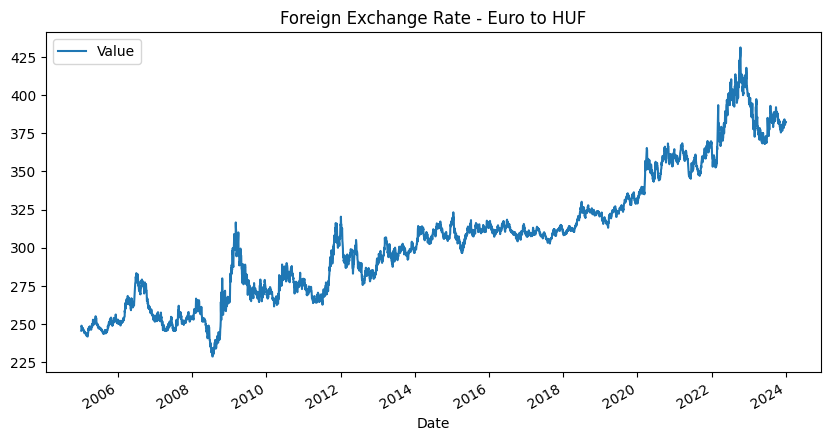

Heti adatok száma:  992


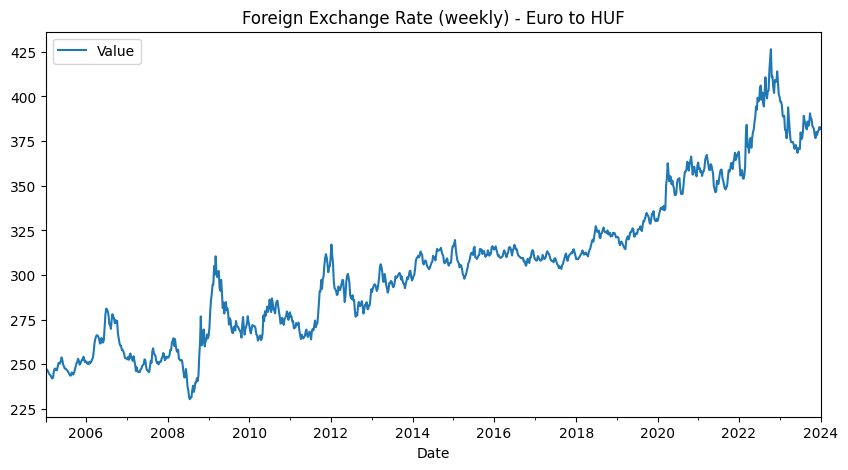

Havi adatok száma:  229


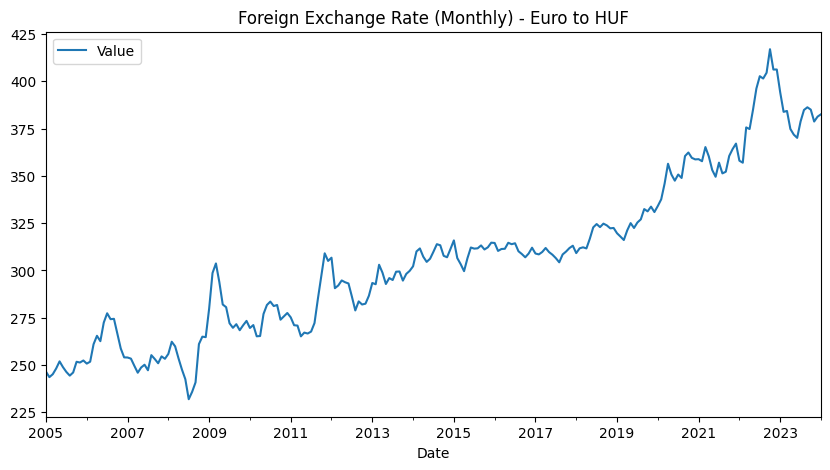

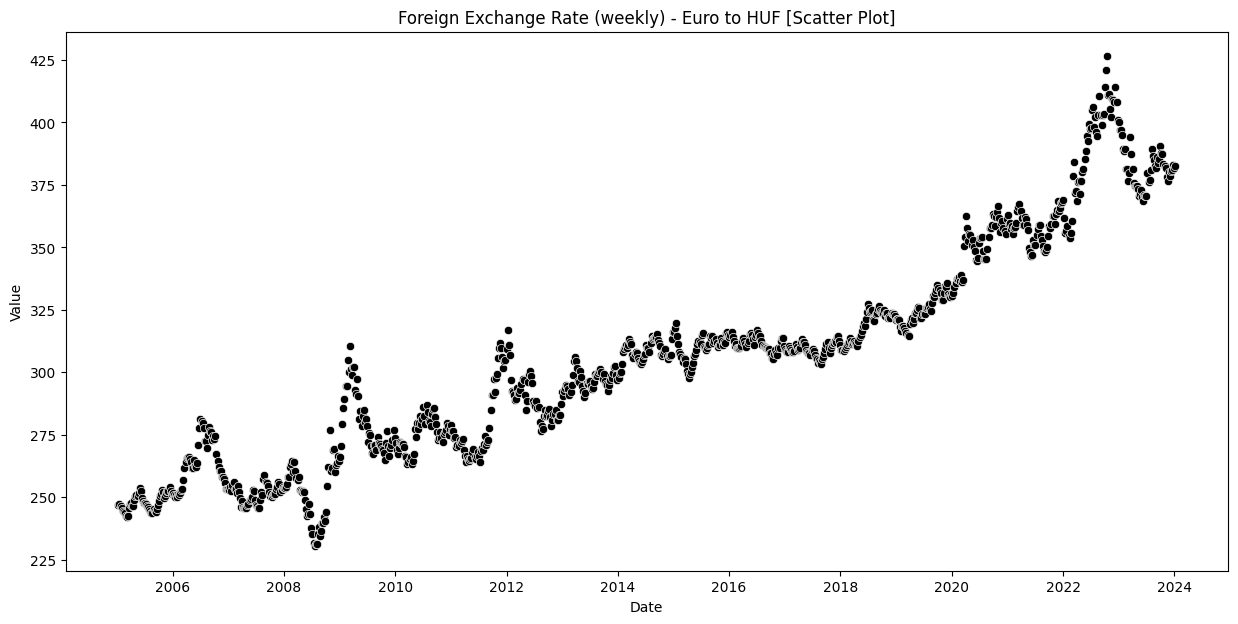

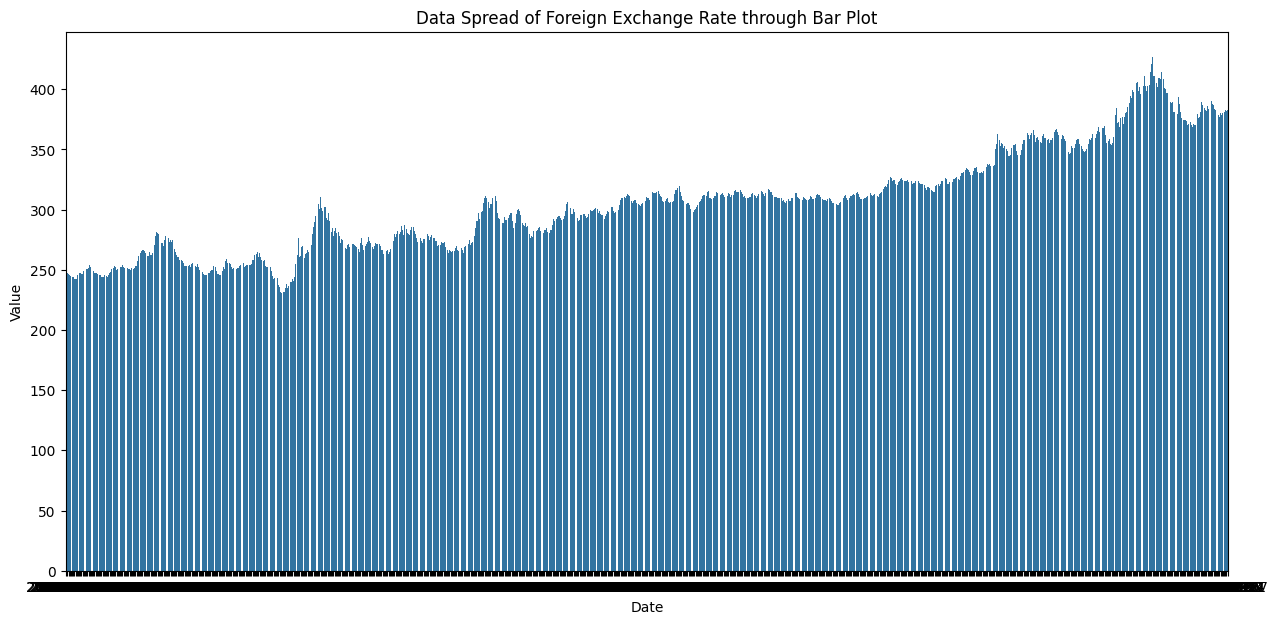

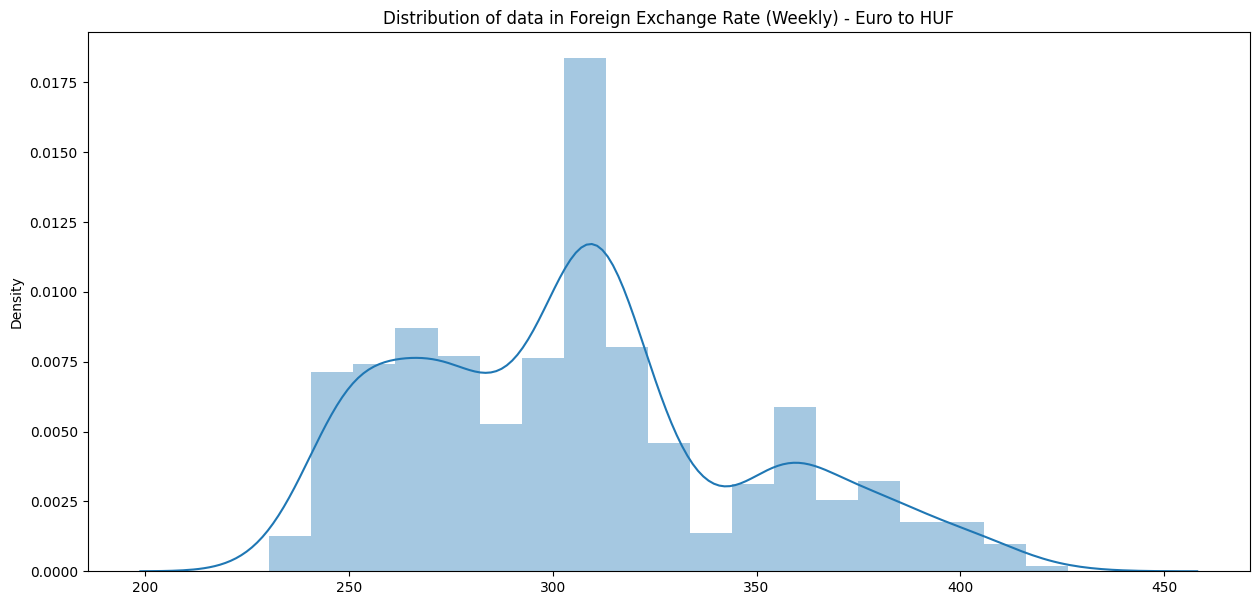

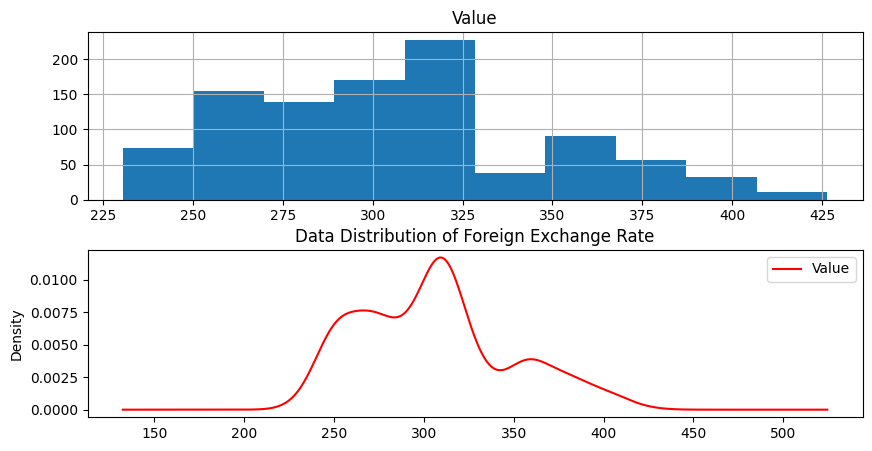

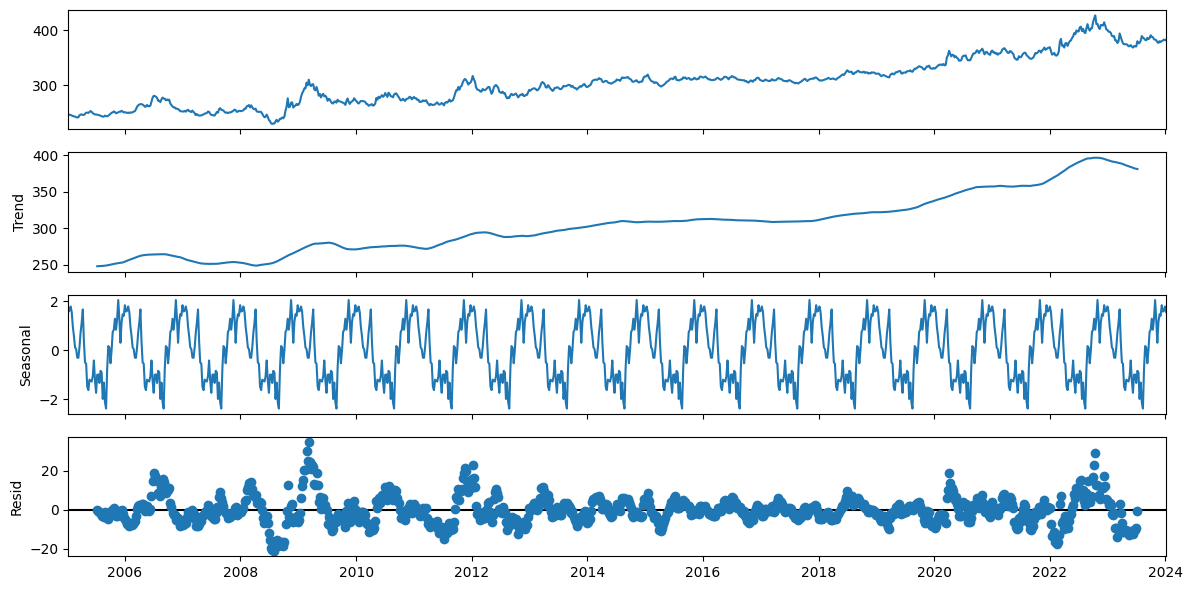

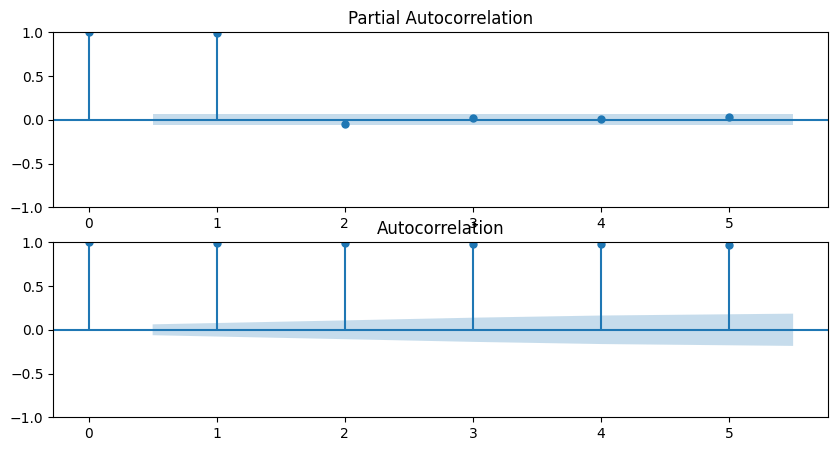

Test Statistic                  -0.608775
p-value                          0.868987
Number of Lags Used             21.000000
Number of Observations Used    970.000000
Critical Value (1%)             -3.437109
Critical Value (5%)             -2.864524
Critical Value (10%)            -2.568359
dtype: float64
Gyenge bizonyíték a null hipotézis elutasítására, így elfogadjuk a null hipotézist, és a sorozat nem stacionárius
Heti elsődleges differencia adatok száma 991
Test Statistic                -7.765411e+00
p-value                        9.216321e-12
Number of Lags Used            2.000000e+01
Number of Observations Used    9.700000e+02
Critical Value (1%)           -3.437109e+00
Critical Value (5%)           -2.864524e+00
Critical Value (10%)          -2.568359e+00
dtype: float64
Elsődleges bizonyíték a null hipotézis elutasítására, így elutasítjuk a null hipotézist, és a sorozat stacionárius


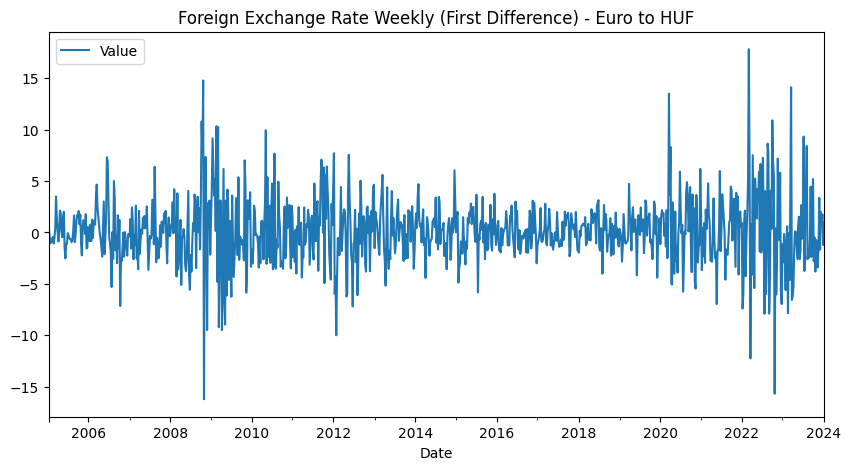

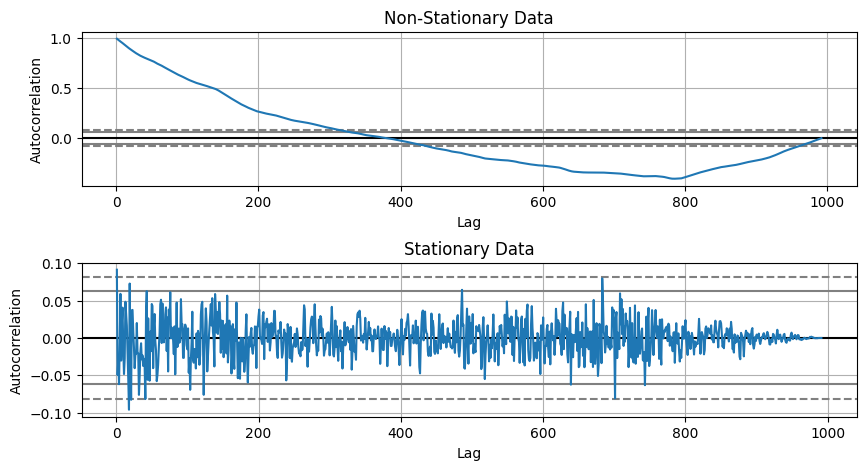

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5063.447, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5068.668, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5062.363, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5061.398, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5068.581, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5061.608, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5061.039, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5061.668, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5062.677, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5063.659, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5060.813, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5060.989, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5061.682, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=5062.524, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]          

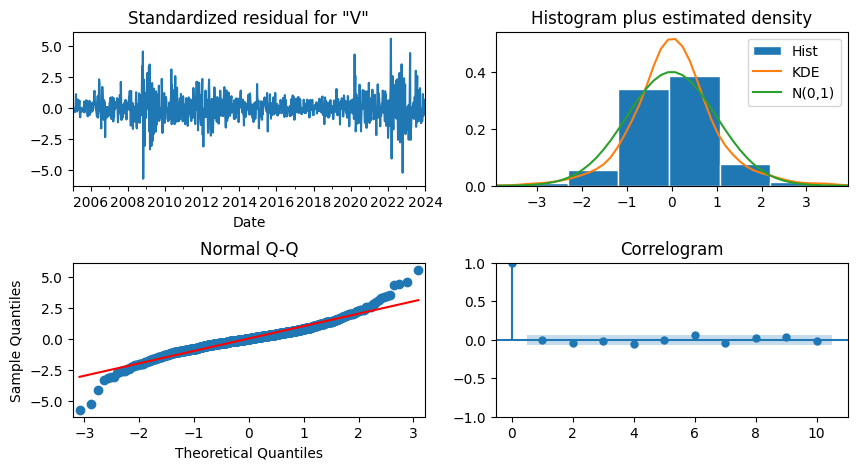

Kiértékelés az összes adatra:  

R2 Score az összes adatra: 95.95 % 

Mean Squared Error :  71.06792215583413 

Mean Absolute Error :  2.4314468805227154 

Root Mean Squared Error :  8.430179248143785 

Mean Absolute Percentage Error : 0.81 %
Tanító adatok száma:  793
Teszt adatok száma:  199
Előrejelzett vs. valós értékek kiírása....


Előrejelzett = 337.232073 , Valós = 350.599000
Előrejelzett = 352.018069 , Valós = 354.279000
Előrejelzett = 354.523057 , Valós = 362.588000
Előrejelzett = 363.492089 , Valós = 357.574000
Előrejelzett = 356.961295 , Valós = 352.499000
Előrejelzett = 352.014482 , Valós = 355.428000
Előrejelzett = 355.793604 , Valós = 354.862000
Előrejelzett = 354.762761 , Valós = 350.839000
Előrejelzett = 350.416834 , Valós = 352.862000
Előrejelzett = 353.120924 , Valós = 350.072000
Előrejelzett = 349.753049 , Valós = 348.693000
Előrejelzett = 348.581561 , Valós = 344.789000
Előrejelzett = 344.388024 , Valós = 344.743000
Előrejelzett = 344.780377 , Valós = 345.664000
Elő

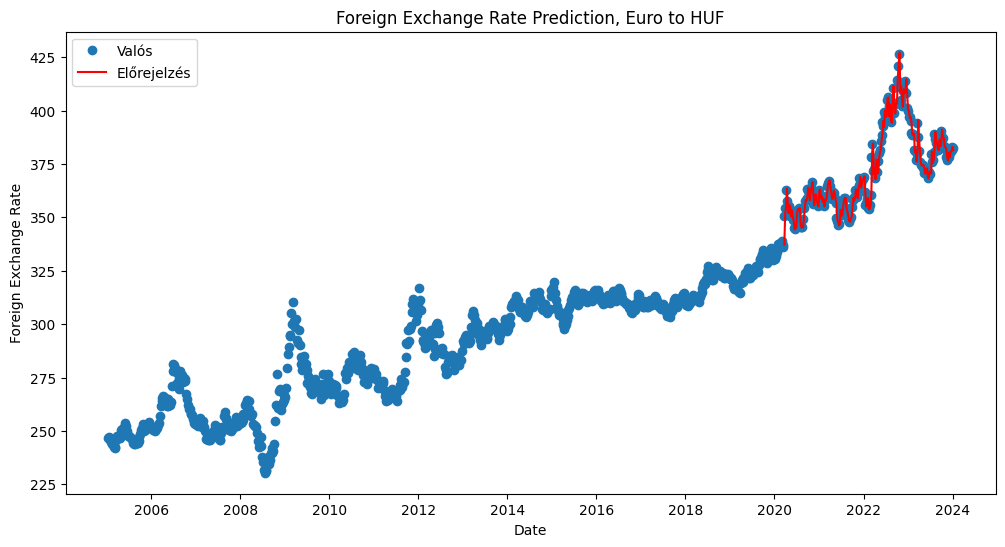

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

# Munkakönyvtár megváltoztatása, adatok beolvasása, szükséges oszlopok kiválasztása, oszlop átnevezése, dátumformátum átalakítása és adatok megjelenítése
os.chdir('/content/sample_data')
table_sum = pd.read_csv('EUR_HUF Historical Data 05-24.csv')
df = table_sum[["Date", "Price"]]
df.rename(columns={"Price": "Value"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y").dt.strftime("%Y-%m-%d")
df.head()

# Exploratory Data Analysis (EDA)
# Adatok alakjának megjelenítése, hiányzó értékek ellenőrzése, duplikált sorok ellenőrzése, adattípusok ellenőrzése, alapvető statisztikák megjelenítése teszt jeleggel
df.shape
df.isnull().sum()
df.duplicated().sum()
df.dtypes
df.describe()

# Data Processing
# Dátumformátum átalakítása és időindex létrehozása
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Data Processing & Visualization
# Adatok megjelenítése vonaldiagramon
df.plot(figsize=(10, 5))
plt.title('Foreign Exchange Rate - Euro to HUF')
plt.show()

# Heti átlagok kiszámítása és megjelenítése
df_week = df.resample('W').mean()
print('Heti adatok száma: ', df_week.shape[0])
df_week.head()

df_week.plot(figsize=(10, 5))
plt.title('Foreign Exchange Rate (weekly) - Euro to HUF')
plt.show()

# Havi átlagok kiszámítása és megjelenítése
df_month = df.resample('M').mean()
print('Havi adatok száma: ', df_month.shape[0])
df_month.head()

df_month.plot(figsize=(10, 5))
plt.title('Foreign Exchange Rate (Monthly) - Euro to HUF')
plt.show()

# Heti átlagok szóródási diagramja
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x=df_week.index, y=df_week.Value, color='black')
plt.title('Foreign Exchange Rate (weekly) - Euro to HUF [Scatter Plot]')
plt.show()

# Heti átlagok eloszlása oszlopdiagramon
sns.barplot(data=df_week, x=df_week.index, y=df_week.Value)
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot')
plt.show()

# Heti átlagok eloszlásának hisztogramja és sűrűségfüggvénye
sns.distplot(df_week)
plt.title('Distribution of data in Foreign Exchange Rate (Weekly) - Euro to HUF')
plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(10, 5))
df_week.hist(ax=ax1)
df_week.plot(kind='kde', ax=ax2, c='r')
plt.title('Data Distribution of Foreign Exchange Rate')
plt.show()

# Szezonális bontás megjelenítése
plt.rcParams['figure.figsize'] = (12, 6)
decomposition = seasonal_decompose(df_week, period=52, model='additive')
decomposition.plot()
plt.show()

# Parciális autokorreláció és autokorreláció megjelenítése
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(10, 5))
ax1 = plot_pacf(df_week, lags=5, ax=ax1)
ax2 = plot_acf(df_week, lags=5, ax=ax2)
plt.show()

# Data Transformation
# Augmented Dickey-Fuller teszt végrehajtása
def adf_check(time_series):
    result = adfuller(time_series, autolag='AIC')
    label = pd.Series(result[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in result[4].items():
        label['Critical Value (%s)' % key] = value
    print(label)
    if result[1] <= 0.05:
        print('Elsődleges bizonyíték a null hipotézis elutasítására, így elutasítjuk a null hipotézist, és a sorozat stacionárius')
    else:
        print('Gyenge bizonyíték a null hipotézis elutasítására, így elfogadjuk a null hipotézist, és a sorozat nem stacionárius')

adf_check(df_week)

# Az adatok első differenciálásának elvégzése és megjelenítése
df1_week = df_week.diff().dropna()
print('Heti elsődleges differencia adatok száma', df1_week.shape[0])
df1_week.head()

adf_check(df1_week)

df1_week.plot(figsize=(10, 5))
plt.title('Foreign Exchange Rate Weekly (First Difference) - Euro to HUF')
plt.show()

# Autokorreláció megjelenítése nem stacionárius és stacionárius adatokra
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(10, 5))
ax1 = autocorrelation_plot(df_week, ax=ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_week, ax=ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace=0.5)
plt.show()

# Model Fitting
# ARIMA modell paramétereinek automatikus meghatározása
model = auto_arima(df_week, m=52, d=1, seasonal=False, max_order=8, test='adf', trace=True)
model.summary()

# ARIMA modell illesztése a heti átlagokhoz
model = ARIMA(df_week, order=(0, 1, 1))
result = model.fit()
result.summary()

# ARIMA modell diagnosztikai ábráinak megjelenítése
result.plot_diagnostics(figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)
plt.show()

# ARIMA modell előrejelzése és kiértékelése az összes adatra
predictions = result.predict(typ='levels')

# Model Evaluation
print('Kiértékelés az összes adatra: ','\n')
print('R2 Score az összes adatra: {0:.2f} %'.format(100 * r2_score(df_week['Value'], predictions)), '\n')
print('Mean Squared Error : ', mean_squared_error(df_week['Value'], predictions), '\n')
print('Mean Absolute Error : ', mean_absolute_error(df_week['Value'], predictions), '\n')
print('Root Mean Squared Error : ', sqrt(mean_squared_error(df_week['Value'], predictions)), '\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100 * mean_absolute_percentage_error(df_week['Value'], predictions)))

# Result
# Az előrejelzett adatok és az eredeti adatok összehasonlítása
Final_data = pd.concat([df_week, df1_week, predictions], axis=1)
Final_data.columns = ['Foreign Exchange Rate (heti átlag)', 'Heti elsődleges differencia', 'Előrejelzett árfolyam']
Final_data.head()

# Model Testing
# Tanító- és tesztadatok kiválasztása (80% train - 20% test)
size = int(len(df_week) * 0.80)
train, test = df_week[0:size]['Value'], df_week[size:(len(df_week))]['Value']
print('Tanító adatok száma: ', train.shape[0])
print('Teszt adatok száma: ', test.shape[0])

train_values = [x for x in train]
prediction = []
print('Előrejelzett vs. valós értékek kiírása....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values, order=(0, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('Előrejelzett = %f , Valós = %f' % (pred_out, test_in))

# Tesztadatok előrejelzésének kiértékelése
print('Kiértékelés a tesztadatokra: ','\n')
print('R2 Score a tesztadatokra: {0:.2f} %'.format(100 * r2_score(test, prediction)), '\n')
print('Mean Squared Error : ', mean_squared_error(test, prediction), '\n')
print('Mean Absolute Error : ', mean_absolute_error(test, prediction), '\n')
print('Root Mean Squared Error : ', sqrt(mean_squared_error(test, prediction)), '\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100 * mean_absolute_percentage_error(test, prediction)))

# Tesztadatok előrejelzéseinek megjelenítése
predictions_df = pd.Series(prediction, index=test.index)

plt.rcParams['figure.figsize'] = (12, 6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, Euro to HUF', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label='Valós')
ax.plot(predictions_df, 'r', label='Előrejelzés')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
plt.show()